# Wstęp

## Cel
 
Celem naszego projektu jest porównanie kilku różnych modeli uczenia maszynowego (KNN, naiwny klasyfikator Bayesa, SVM) oraz sprawdzenia, jak zachowają się przy wykorzystaniu PCA.

## Wykorzystane technologie

Nasz projekt piszemy w języku Python 3.X. Opiera się on o wykorzystanie biblioteki scikit-learn, która w łatwy sposób pozwala zbudować modele UM i posiada wiele zaawansowanych metod.  
Pomocniczo wykorzystujemy biblioteki takie jak Scipy, Pandas, NumPy oraz Seaborn, które pomagają w zarządzaniu danymi czy ich wizualizacji.

## Wybrany zbiór

### Ogólnie o zbiorze
Do naszego projektu wybraliśmy zbiór [Website Phishing Data Set](https://archive.ics.uci.edu/ml/datasets/Website+Phishing?fbclid=IwAR3AlsSzJnVieIZf0I7PcAAERYn6_5VjCi7dGnuARfY2Wsdb29tTyP_odGs), który przedstawia informacje na temat 1353 stron internetowych pod kątem wykorzystania do ataków Phishingowych.  

### Technicznie o zbiorze
Zbiór zawiera 10 kolumn, a każda z nich informację {-1, 0, 1}, co oznacza kolejno {potwierdzony negatywny, niepotwierdzony, potwierdzony pozytywny}.  
Spośród 1353 stron 548 zostało zaklasyfikowanych jako w pełni legalny, 702 jako Phishingowe, a 103 jako podejrzane.  
  
Zbiór zawiera kolejne cechy {zakres danych}:  
@attribute SFH {1,-1,0}  - SFH to pusty ciąg lub termin „about: blank” na stronie internetowej podejrzanej o phishing, nazwa domeny w SFH będzie się różnić w zależności od nazwy domeny stron internetowych.

@attribute popUpWidnow {-1,0,1} -  Wyłudzanie informacji typu pop-up obejmuje fałszywe wiadomości, które „wyskakują” użytkownikom podczas surfowania w sieci.

@attribute SSLfinal_State {1,-1,0} - 

@attribute Request_URL {-1,0,1} - 
Na legalnej strone, adresy stron internetowych, zdjęcia, filmy i dźwięki zawarte na
strona internetowa w tej samej domenie i nie odbiera z innej domeny. 

@attribute URL_of_Anchor {-1,0,1}  - Jeśli tag to <a>, a witryna ma inną nazwę domeny, może być podejrzana

@attribute web_traffic {1,0,-1} -  

@attribute URL_Length {1,-1,0}  - długie adresy URL sa podejrzane o bycie witryną phishingową, jeśli długość adresu URL jest większa lub równa 54 znaki, to adres URL uwzględniona jako strona phishingowa.

@attribute age_of_domain {1,-1}  

@attribute having_IP_Address {0,1} - jeśli nazwa domeny posiada adres IP - jest podejrzana o phishing  

@attribute Result {0,1,-1} - 

# Wczytanie danych

In [25]:
from scipy.io import arff
from sklearn.preprocessing import normalize 
import numpy as np
import pandas as pd

PhishingData = arff.loadarff('PhishingData.arff')
df_PhishingData = pd.DataFrame(PhishingData[0])
df_PhishingData

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,b'1',b'-1',b'1',b'-1',b'-1',b'1',b'1',b'1',b'0',b'0'
1,b'-1',b'-1',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1'
2,b'1',b'-1',b'0',b'0',b'-1',b'0',b'-1',b'1',b'0',b'1'
3,b'1',b'0',b'1',b'-1',b'-1',b'0',b'1',b'1',b'0',b'0'
4,b'-1',b'-1',b'1',b'-1',b'0',b'0',b'-1',b'1',b'0',b'1'
...,...,...,...,...,...,...,...,...,...,...
1348,b'-1',b'-1',b'-1',b'-1',b'-1',b'-1',b'0',b'1',b'0',b'1'
1349,b'-1',b'0',b'1',b'0',b'-1',b'0',b'0',b'1',b'0',b'-1'
1350,b'-1',b'0',b'-1',b'-1',b'-1',b'0',b'-1',b'-1',b'0',b'1'
1351,b'0',b'0',b'1',b'0',b'0',b'0',b'-1',b'1',b'0',b'1'


# Podział danych na na cechy oraz {zbiór Y} oraz normalizacja cech

In [26]:
# Rozbicie macierzy na zbiór X i Y
PhishingData_X = df_PhishingData.iloc[:,:-1]
PhishingData_Y = df_PhishingData.iloc[:,-1].astype('b').values

## Utworzenie i analiza macierzy korelacji

In [27]:
corr = PhishingData_X.astype(float).corr()
corr.style.background_gradient().set_precision(2)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
SFH,1.00,0.38,0.37,0.26,0.33,-0.19,0.15,0.16,0.04
popUpWidnow,0.38,1.00,0.22,0.11,0.17,-0.14,0.14,0.08,0.12
SSLfinal_State,0.37,0.22,1.00,0.06,0.09,-0.17,0.10,0.21,0.11
Request_URL,0.26,0.11,0.06,1.00,0.34,-0.05,0.05,0.05,0.01
URL_of_Anchor,0.33,0.17,0.09,0.34,1.00,-0.09,0.10,0.07,0.04
web_traffic,-0.19,-0.14,-0.17,-0.05,-0.09,1.00,-0.11,-0.68,-0.09
URL_Length,0.15,0.14,0.10,0.05,0.10,-0.11,1.00,0.08,0.17
age_of_domain,0.16,0.08,0.21,0.05,0.07,-0.68,0.08,1.00,0.04
having_IP_Address,0.04,0.12,0.11,0.01,0.04,-0.09,0.17,0.04,1.00


Powyższa macierz korelacji pokazuje nam, że dane nie wykazują zbyt dużych korelacji za wyjątkiem SFH z (popUpWindndow i SSLfinal_State), age_of_domain z web_traffic oraz URL_of_Anchor z Request_URL.

# podział zbiorów na testowy i treningowy


In [28]:
from sklearn.model_selection import train_test_split
PhishingData_X_train, PhishingData_X_test, PhishingData_Y_train, PhishingData_Y_test = \
  train_test_split(PhishingData_X, PhishingData_Y, test_size=0.3,random_state=2)

# PCA

W pierwszej kolejności sprawdzimy, jak PCA wpłynie na nasze dane i dla 2 i więcej cech (poza wszystkimi).

In [29]:
from sklearn.decomposition import PCA, IncrementalPCA

for i in range(2,9):

  pca = PCA(n_components=i)
  pca.fit(PhishingData_X_train)

  print(f"redukcja z 9 do {i} wymiarów zapewniła dokładność na poziomie \
          {sum(pca.explained_variance_ratio_* 100.0):.1f}%.")

redukcja z 9 do 2 wymiarów zapewniła dokładność na poziomie           50.5%.
redukcja z 9 do 3 wymiarów zapewniła dokładność na poziomie           63.2%.
redukcja z 9 do 4 wymiarów zapewniła dokładność na poziomie           72.7%.
redukcja z 9 do 5 wymiarów zapewniła dokładność na poziomie           80.8%.
redukcja z 9 do 6 wymiarów zapewniła dokładność na poziomie           88.4%.
redukcja z 9 do 7 wymiarów zapewniła dokładność na poziomie           94.3%.
redukcja z 9 do 8 wymiarów zapewniła dokładność na poziomie           98.5%.


Po zobaczeniu powyższej informacji zdecydowaliśmy się przeprowadzić uczenie dla 7, 8 oraz 9 cech celem sprawdzenia różnic w dokładności algorytmów między nimi.

In [30]:
print("wartość znaczenia kolejnych cech:\n" + "\n".join(str(i) for i in pca.explained_variance_ratio_))

wartość znaczenia kolejnych cech:
0.30237067538576295
0.20263833574719328
0.12718288439768932
0.09527868544230858
0.08077348484406617
0.07601460060548396
0.05910931478532397
0.04125294145601618


Poniżej wykonujemy PCA aby uzyskać zbiory 7 i 8 wymariowe, a następnie łączy wszystko w listę, aby w następnych operacjach mieć łatwiejszy dostęp do danych.  
Do podziału zbioru na zbiór treningowy i testowy wykorzystaliśmy metodę `train_test_split`, dane zostały podzielone w stosunku 7:3 (treningowy: testowy).  
Dzięki wykorzystaniu argumentu `random_state` mamy pewność, że nasze zbiory zawsze zostaną podzielone w ten sam sposób, co pozwoliło nam wykorzystać za każdym razem ten sam zbiór i porównać wyniki za każdym razem na tym samym zbiorze.

In [31]:
# PCA 6
pca = PCA(n_components=7)
pca.fit(PhishingData_X)
PhishingData_X_pca_7 = pca.transform(PhishingData_X)

PhishingData_X_train_pca_7, PhishingData_X_test_pca_7, *_ = \
  train_test_split(PhishingData_X_pca_7, PhishingData_Y, test_size=0.3,random_state=2)

# PCA 7
pca = PCA(n_components=8)
pca.fit(PhishingData_X)
PhishingData_X_pca_8 = pca.transform(PhishingData_X)

PhishingData_X_train_pca_8, PhishingData_X_test_pca_8, *_ = \
  train_test_split(PhishingData_X_pca_8, PhishingData_Y, test_size=0.3,random_state=2)

# Skumulowanie PhishingData_X do jednej tablicy celem ułatwienia obliczen na kilku zbiorach
PhishingData_X_train_full = [PhishingData_X_train_pca_7, PhishingData_X_train_pca_8, PhishingData_X_train.astype("float").values]
PhishingData_X_test_full = [PhishingData_X_test_pca_7, PhishingData_X_test_pca_8, PhishingData_X_test.astype('float').values]

# Poniżej zbiór treningowy zawierający [treningowy_X_7_wym, treningowy_X_8_wym, treningowy_X_9_wym]
PhishingData_X_train_full
# oraz zbiór Y
PhishingData_Y_train

# Poniżej zbiór testowy zawierający [treningowy_X_7_wym, treningowy_X_8_wym, treningowy_X_9_wym]
PhishingData_X_test_full
# oraz zbiór y
PhishingData_Y_test

None

# Naiwny klasyfikator Bayes


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Naiwny klasyfikator Bayesa osiągnął efektywność dla 7 komponentów na poziomie 
  zbiór treningowy: 83.74 zbiór testowy: 81.03 %
##################################################
              precision    recall  f1-score   support

          -1       0.83      0.90      0.86       213
           0       0.50      0.15      0.23        34
           1       0.80      0.83      0.82       159

    accuracy                           0.81       406
   macro avg       0.71      0.63      0.64       406
weighted avg       0.79      0.81      0.79       406

##################################################
Naiwny klasyfikator Bayesa osiągnął efektywność dla 8 komponentów na poziomie 
  zbiór treningowy: 83.42 zbiór testowy: 81.28 %
##################################################
              precision    recall  f1-score   support

          -1       0.82      0.91      0.86       213
           0       0.62      0.15      0.24        34
           1       0.80      0.83      0.82    

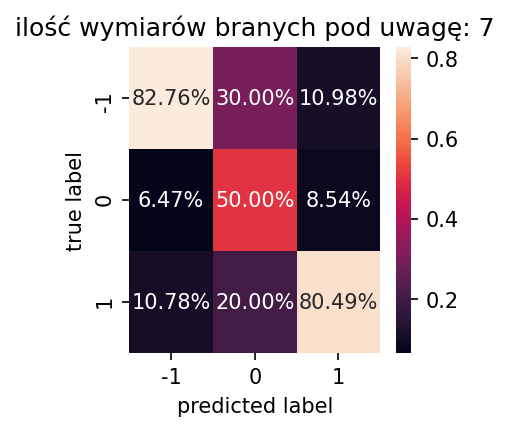

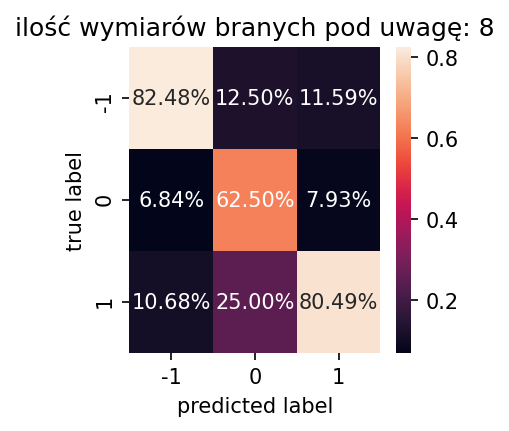

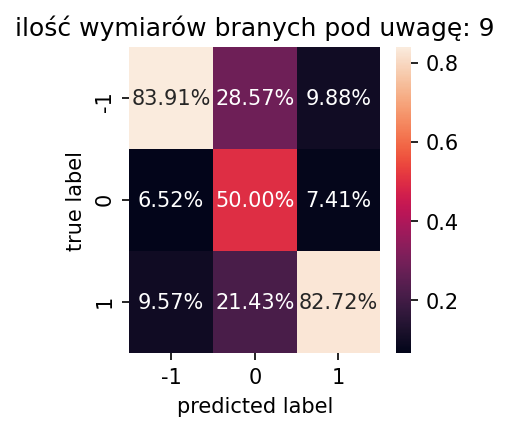

In [90]:
gnb = GaussianNB()
for i, x_train, x_test in zip(range(3), PhishingData_X_train_full, PhishingData_X_test_full):
  gnb.fit(x_train, PhishingData_Y_train)
  PhishingData_Y_pred = gnb.predict(x_test)
  print(f"""Naiwny klasyfikator Bayesa osiągnął efektywność dla {i+7} komponentów na poziomie 
  zbiór treningowy: {accuracy_score(PhishingData_Y_train,gnb.predict(x_train))*100:.2f} zbiór testowy: {accuracy_score(PhishingData_Y_test, PhishingData_Y_pred)*100:.2f} %""")
  print("#"*50)
  print(classification_report(PhishingData_Y_test, PhishingData_Y_pred))
  print("#"*50)
  plt.figure(figsize=(2.7, 2.7), dpi=150)
  plt.title(f"ilość wymiarów branych pod uwagę: {i+7}")
  cf_matrix_bayes = confusion_matrix(PhishingData_Y_test, PhishingData_Y_pred)
  g = sns.heatmap(cf_matrix_bayes/np.sum(cf_matrix_bayes, axis=0),annot=True, fmt='.2%', yticklabels=[-1, 0, 1], xticklabels=[-1, 0, 1])
  g.set(xlabel='predicted label', ylabel='true label')
None

## Bayes - podsumowanie
  
Jak widzimy powyżej, różnica między 7, 8 a 9 wymiarami nie jest wcale jakaś duża i już 7 wymiarów daje całkiem satysfakcjonujący wynik (ponad 80%) na zbiorze testowym, dochodząc do ~82.3% na przy 8 wymiarach.  
  
W powyższej klasyfikacji szczególnie kiepsko wypada zaklasyfikowanie strony jako niepewnej. Fakt ten jest zapewne spowodowany małą różnicą między wartościami "sąsiednimi" oraz przede wszystkim małą liczbą przykładów, gdyż jest to zaledwie ok 7.5%.  
  
W realnej sytuacji wolelibyśmy, aby dana strona była klasyfikowana raczej w kierunku negatywnym, tj. klasyfikator byłby w przypadku "granicznym" zaklasyfikować stronę bardziej w kierunku negatywnej, gdyż ostatecznie zapewniłoby to większy poziom bezpieczeństwa. Zatem precyzja sama w sobie nie jest dla nas satysfakcjonująca, a zależałoby nam głównie na pełności przy klasie oznaczonej "-1". 
  
W powyższym przypadku pełność na poziomie ponad 90% i precyzja na poziomie bliskim 84 we wszystkich 3 przypadkach wydaje się być całkiem satysfakcjonująca.

Ciekawy wydaje się też fakt, że wraz z dokładaniem kolejnych wymiarów nasz klasyfikator tracił (minimalnie ale jednak) dokładność precyzji na zbiorze treningowym.

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

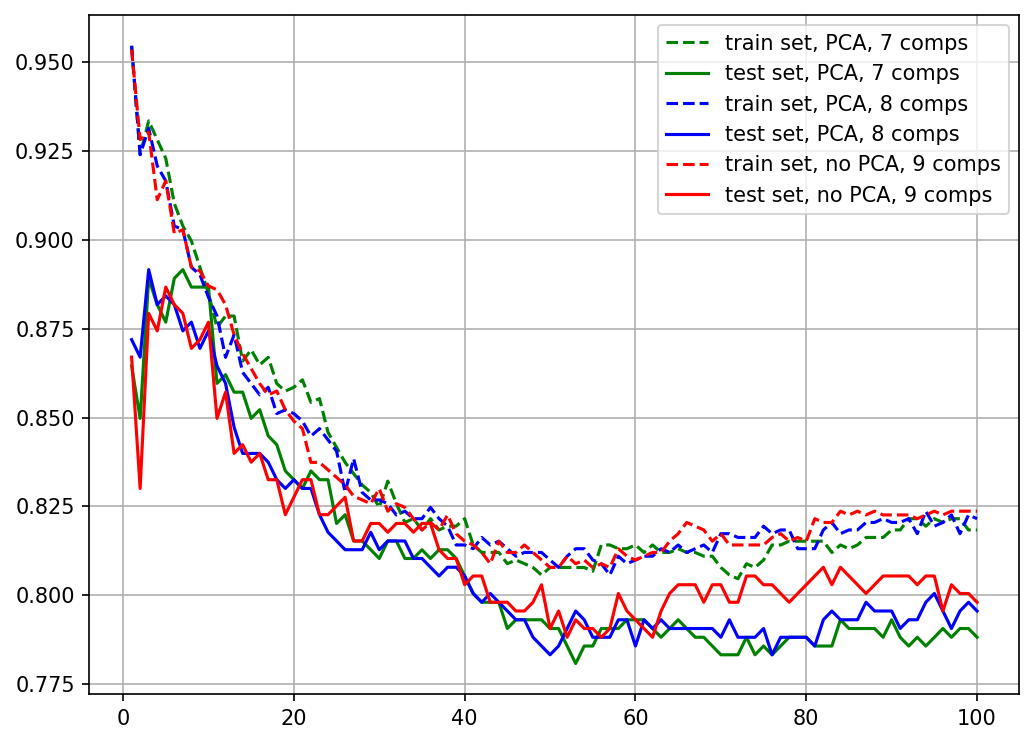

In [91]:
train_accuracy, test_accuracy = [[],[],[]], [[],[],[]]
best_test_score = [0,0,0]
best_knc=[None,None,None]
figure(figsize=(8, 6), dpi=150)

for i, x_train, x_test in zip(range(3), PhishingData_X_train_full, PhishingData_X_test_full):
  for n in range(1, 101):
    curr_knc = KNC(n_neighbors=n)
    curr_knc.fit(x_train, PhishingData_Y_train)
    PhishingData_Y_KNN_pred = curr_knc.predict(x_test)
    train_accuracy[i].append(accuracy_score(PhishingData_Y_train,curr_knc.predict(x_train)))
    test_accuracy[i].append(accuracy_score(PhishingData_Y_test, PhishingData_Y_KNN_pred))
    if best_test_score[i] < test_accuracy[i][-1]:
      best_test_score[i] = test_accuracy[i][-1]
      best_knc[i] = curr_knc
   

#plt.xticks(range(3,101), 1.)
for i, color, set_name in zip(range(3), 'gbr',['PCA, 7 comps','PCA, 8 comps', 'no PCA, 9 comps']):
  plt.plot(range(1,101), train_accuracy[i], f'{color}--', label=f'train set, {set_name}') 
  plt.plot(range(1,101), test_accuracy[i],f'{color}-', label=f'test set, {set_name}')
plt.legend()
plt.grid()
plt.show()
None

In [92]:
print('najlepsze wyniki na zbiorze testowym osiągnęły kolejne modele:')
best_knc

najlepsze wyniki na zbiorze testowym osiągnęły kolejne modele:


[KNeighborsClassifier(n_neighbors=7),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier()]

Jak widać powyżej, nasz model preferuje małe ilości sąsiadów, kolejno: 7, 3, 5 (wartość domyślna dla KNN w sklearn). 

Algorytm KNN osiągnął efektywność na poziomie
    zbiór treningowy: 90.39 zbiór testowy: 89.16 %
##################################################
              precision    recall  f1-score   support

          -1       0.90      0.92      0.91       213
           0       0.80      0.71      0.75        34
           1       0.89      0.90      0.90       159

    accuracy                           0.89       406
   macro avg       0.87      0.84      0.85       406
weighted avg       0.89      0.89      0.89       406

##################################################
Conf. Matrix
Algorytm KNN osiągnął efektywność na poziomie
    zbiór treningowy: 93.14 zbiór testowy: 89.16 %
##################################################
              precision    recall  f1-score   support

          -1       0.92      0.91      0.92       213
           0       0.78      0.74      0.76        34
           1       0.87      0.90      0.89       159

    accuracy                           0.

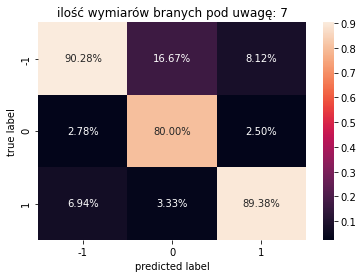

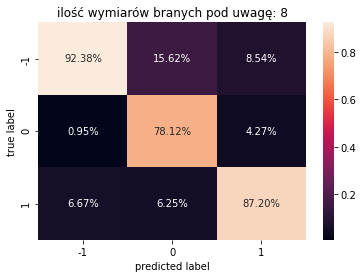

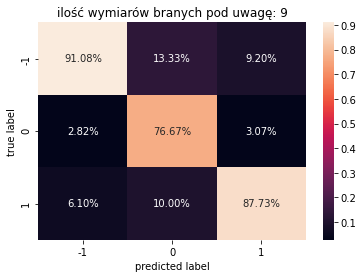

In [83]:
for i, x_train, x_test in zip(range(3), PhishingData_X_train_full, PhishingData_X_test_full):
    PhishingData_Y_KNN_pred = best_knc[i].predict(x_test)
    print(f"""Algorytm KNN osiągnął efektywność na poziomie
    zbiór treningowy: {accuracy_score(PhishingData_Y_train,best_knc[i].predict(x_train))*100:.2f} zbiór testowy: {accuracy_score(PhishingData_Y_test, PhishingData_Y_KNN_pred)*100:.2f} %""")
    print("#"*50)
    print(classification_report(PhishingData_Y_test, PhishingData_Y_KNN_pred))
    print("#"*50)
    print("Conf. Matrix")
    cf_matrix_knn = confusion_matrix(PhishingData_Y_test, PhishingData_Y_KNN_pred)
    plt.figure()
    plt.title(f"ilość wymiarów branych pod uwagę: {i+7}")
    g=sns.heatmap(cf_matrix_knn/np.sum(cf_matrix_knn, axis=0), annot=True, fmt='.2%', yticklabels=[-1,0,1], xticklabels=[-1,0,1])
    g.set(xlabel='predicted label', ylabel='true label')

# KNN - klasyfikacja
KNN poradził sobie lepiej praktycznie na każdym polu, za wyjątkiem pełności. Precyzja znacznie wzrosła w kluczowej dla nas grupie - `-1`.  
Macierz pomyłek wykazuje zdecydowaną poprawę dla grupy 0 - podejrzanej, oraz po kilka pproc. poprawy na pozostałych polach na przekątnej o

# SVM

7 wymiarów: dokładność klasyfikacji na zbiorze testowym: 0.8596059113300493, na zbiorze treningowym: 0.9355860612460402
##################################################
              precision    recall  f1-score   support

          -1       0.84      0.93      0.88       213
           0       0.77      0.71      0.74        34
           1       0.91      0.80      0.85       159

    accuracy                           0.86       406
   macro avg       0.84      0.81      0.82       406
weighted avg       0.86      0.86      0.86       406

##################################################
8 wymiarów: dokładność klasyfikacji na zbiorze testowym: 0.8645320197044335, na zbiorze treningowym: 0.9461457233368532
##################################################
              precision    recall  f1-score   support

          -1       0.86      0.93      0.89       213
           0       0.68      0.62      0.65        34
           1       0.91      0.83      0.87       159

    accu

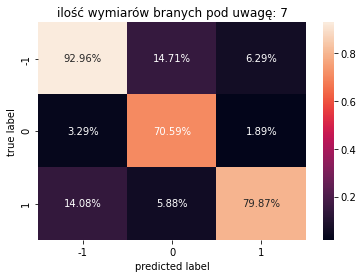

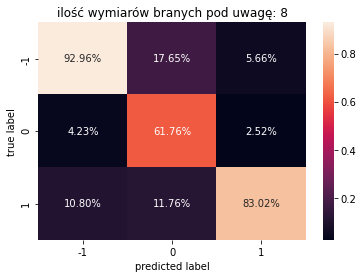

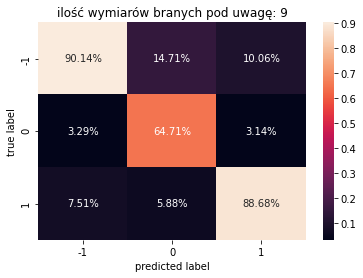

In [675]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform
import matplotlib.pyplot as plt

%notebook inline

parameters = {'kernel': ('linear', 'rbf', 'poly'),
              'C': loguniform(1e-5, 0.2),
              'gamma': [0.01, 1],
              'degree': [2, 3, 4, 5]}
svc = svm.SVC()
for i, x_train, x_test in zip(range(3), PhishingData_X_train_full, PhishingData_X_test_full):
  setRS = RandomizedSearchCV(svc, parameters,random_state=2).fit(x_train, PhishingData_Y_train)
  #print(f'Najlepsze parametry: {setRS.best_params_}')
  print(f'{i+7} wymiarów: dokładność klasyfikacji na zbiorze testowym: {setRS.score(x_test,PhishingData_Y_test)}, na zbiorze treningowym: {setRS.score(x_train,PhishingData_Y_train)}')
  PhishingData_Y_svm_pred = setRS.predict(x_test)
  print("#"*50)
  print(classification_report(PhishingData_Y_test, PhishingData_Y_svm_pred))
  print("#"*50)
  cf_matrix_svm = confusion_matrix(PhishingData_Y_test, PhishingData_Y_svm_pred)
  plt.figure()
  plt.title(f"ilość wymiarów branych pod uwagę: {i+7}")
  g=sns.heatmap(cf_matrix_svm/np.sum(cf_matrix_svm, axis=1),annot=True, fmt='.2%',yticklabels=[-1,0,1],xticklabels=[-1,0,1])
  g.set(xlabel='predicted label', ylabel='true label')

# SVM - podsumowanie

W przypadku redukcji do 7 i 8 wymiarów występuje niewielka poprawa w klasyfikacji do grupy -1.
 Klasyfikacja do grupy 0 w porównaniu do naiwnego klasyfikatora Bayesa wypada lepiej zarówno po zredukowaniu wymiarów, jak i dla surowych danych. 
 W porównaniu do KNN skuteczność wypada jednak nieco gorzej. 
 Klasyfikacja do grupy 1 jest porównywalna do Bayesa po redukcji do 8 wymiarów, przy 7 skuteczność jest mniejsza, na orginalnym wymiarze - o kilka procent większa, ale znacznie traci na jakości w porównaiu do klasyfikatora KNN. Wraz z utratą wymiarów dokładność klasyfikacji na zbiorze testowym maleje, a na treningowym wzrasta.
